In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy
from desert import isnum
from pfunctions import getTimeSteps
from FGMTableV2 import *
from readOFFiles import *
from scipy.interpolate import interp1d
from tableProperties import FGMtableProperties
from lookup import lookup
from oneDCaseReader import oneDCaseReader

In [2]:
FGMtableDict = {}
case1000AdaptiveRoute = "../../Cases/nhep1d/nhep1d1000Adaptive/"
case1000Route         = "../../Cases/nhep1d/nhep1d1000/"
case5000AdaptiveRoute = "../../Cases/nhep1d/nhep1d5000Adaptive/"
case5000Route         = "../../Cases/nhep1d/nhep1d5000/"

FGMtableDict["route"] = case5000AdaptiveRoute
FGMtableDict["Zrange"] = (0.,1.)
FGMtableDict["fuelList"] = ["C7H16"]
FGMtableDict["gridNumber"] = (301,501)
FGMtableDict["gridPower"] = (2,1)
FGMtableDict["extraLookupFields"] = ["Qdot", "OH","C7H15O2"]
FGMtableDict["PVFields"] = ["CO2","CO","HO2","CH2O","H2O"]
FGMtableDict["PVCoeffs"] = [1.2, 0.9, 2.7, 1.5, 1.2]


obj = FGMtable(FGMtableDict)
obj.Allrun("./","./table_m2a5000/")

ZRange: (0.0, 1.0)
grid number in Z/C dimensions: (301, 501)
grid power  in Z/C dimensions: (2, 1)
PV expression: 
1.2xCO2+0.9xCO+2.7xHO2+1.5xCH2O+1.2xH2O
Lookup Fields: ['thermo:psi', 'thermo:kappa', 'thermo:mu', 'T', 'PVMax', 'PVMin', 'SourcePV', 'C7H16', 'Qdot', 'OH', 'C7H15O2']


Reading data from time = 0.0015952727273


Converting data to pandas array

Adding PV

Adding SourcePV

Constructing data for all timesteps
Constructing data for time = 0.0015952727273


Checking monotonic properties
	 Repairing time = 0.0015852727273

Calculating PVMinMax and scaled PV



Generating FGM tables
Dealing with field thermo:psi
Dealing with field thermo:kappa
Dealing with field thermo:mu
Dealing with field T
Dealing with field SourcePV
Dealing with field C7H16
Dealing with field Qdot
Dealing with field OH
Dealing with field C7H15O2


writing ./table_m2a5000/psi_table
writing ./table_m2a5000/kappa_table
writing ./table_m2a5000/mu_table
writing ./table_m2a5000/T_table
writing ./table_m2a5000/PVm

In [ ]:
index = 69
obj.pdFieldData[index*1000:(index+1)*1000]["PV"]

In [ ]:
t = 0.0007
DNSCase = oneDCaseReader("../../Cases/nhep1d/nhep1d1000/")
Zgrid = np.linspace(0,1,301) * np.linspace(0,1,301)
Cgrid = np.linspace(0,1,501)
x_1000 = np.linspace(-0.000512,0.000512,1000)
x_5000 = np.linspace(-0.000512,0.000512,5000)

Z     = DNSCase.readData(t,"Z")
PV    = DNSCase.readData(t,"PV")
C7H16 = DNSCase.readData(t,"C7H16")
T     = DNSCase.readData(t,"T")
RO2   = DNSCase.readData(t,"C7H15O2")
OH    = DNSCase.readData(t,"OH")
HRR   = DNSCase.readData(t,"Qdot")

c1dLookup = lookup("../tables/c1dtable/",["Z", "scaledPV"], ["T","OH","C7H16","T","C7H15O2","OH","HRR"])
m2cLookup = lookup("./table_m2a1000/",["Z", "scaledPV"], ["T","OH","C7H16","T","C7H15O2","OH","Qdot"])
m2fLookup = lookup("./table_m2a5000/",["Z", "scaledPV"], ["T","OH","C7H16","T","C7H15O2","OH","Qdot"])
m3cLookup = lookup("./table_m3a1000/",["Z", "scaledPV"], ["T","OH","C7H16","T","C7H15O2","OH","Qdot"])
m3fLookup = lookup("./table_m3a5000/",["Z", "scaledPV"], ["T","OH","C7H16","T","C7H15O2","OH","Qdot"])

import matplotlib.pyplot as plt

plt.figure(figsize = (13,10))
plt.subplot(411)
# Data points
plt.plot(x_1000, T, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::2], c1dLookup.lookupList(Z, PV, "T")[0][::2], '-', color='orange',markerfacecolor='none', label="chem1d")
plt.plot(x_1000[::3], m2fLookup.lookupList(Z, PV, "T")[0][::3], '-', color='green',markerfacecolor='none', label="method2 fine")
plt.plot(x_1000[::2], m3fLookup.lookupList(Z, PV, "T")[0][::2], '-', color='blue',markerfacecolor='none', label="method3 fine")

# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel('T / [K]')
plt.xlim([-0.00013, 0.00013])
plt.title('Temperature Distribution')
plt.legend()


plt.subplot(412)
# Data points
plt.plot(x_1000, C7H16, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::2], c1dLookup.lookupList(Z, PV, "C7H16")[0][::2], '-', color='orange',markerfacecolor='none', label="chem1d")
plt.plot(x_1000[::3], m2fLookup.lookupList(Z, PV, "C7H16")[0][::3], '-', color='green',markerfacecolor='none', label="method2 fine")
plt.plot(x_1000[::2], m3fLookup.lookupList(Z, PV, "C7H16")[0][::2], '-', color='blue',markerfacecolor='none', label="method3 fine")

# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel(r'$Y_{C7H16}$')
plt.xlim([-0.00013, 0.00013])
plt.title('C7H16 Distribution')
plt.legend()


plt.tight_layout()

plt.subplot(413)
# Data points
plt.plot(x_1000, OH, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::2], c1dLookup.lookupList(Z, PV, "OH")[0][::2], '-', color='orange',markerfacecolor='none', label="chem1d")
plt.plot(x_1000[::3], m2fLookup.lookupList(Z, PV, "OH")[0][::3], '-', color='green',markerfacecolor='none', label="method2 fine")
plt.plot(x_1000[::2], m3fLookup.lookupList(Z, PV, "OH")[0][::2], '-', color='blue',markerfacecolor='none', label="method3 fine")

# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel(r'$Y_{OH}$')
plt.xlim([-0.00013, 0.00013])
plt.title('OH Distribution')
plt.legend()

plt.subplot(414)
# Data points
plt.plot(x_1000, RO2, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::2], c1dLookup.lookupList(Z, PV, "C7H15O2")[0][::2], '-', color='orange',markerfacecolor='none', label="chem1d")
plt.plot(x_1000[::3], m2fLookup.lookupList(Z, PV, "C7H15O2")[0][::3], '-', color='green',markerfacecolor='none', label="method2 fine")
plt.plot(x_1000[::2], m3fLookup.lookupList(Z, PV, "C7H15O2")[0][::2], '-', color='blue',markerfacecolor='none', label="method3 fine")

# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel(r'$Y_{C7H15O2}$')
plt.xlim([-0.00013, 0.00013])
plt.title('C7H15O2 Distribution')
plt.legend()


plt.suptitle("Time = {} ms".format(t*1000), fontsize = 16)
plt.tight_layout()

##plt.savefig("time" + str(t*1000) + ".png",dpi = 100)

In [ ]:
print(np.argmax(PV07))
print(Z07[395])
print(PV07[395])
print(T07lookup[395])
print(T07[395])
# Z07[615]

In [ ]:
objLookup(0.159683,0.271248,"T")
objLookup.lookupList([0.11,0.12],[0.26,0.13],"T")

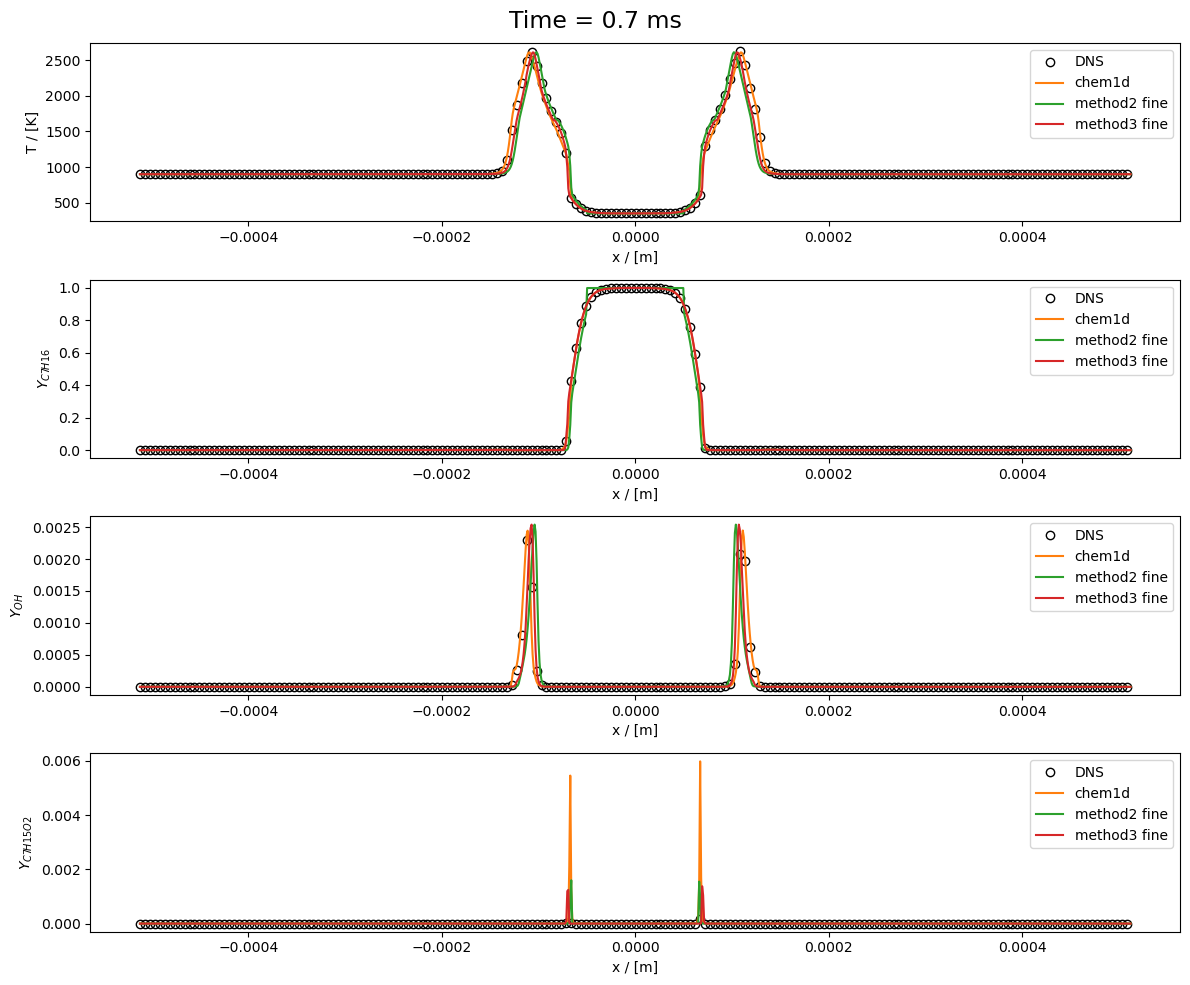

In [47]:
DNSCase = oneDCaseReader("../../Cases/nhep1d/nhep1d1000/")
c1dCase = oneDCaseReader("../../Cases/nhep1d/c1d/")
m2fCase = oneDCaseReader("../../Cases/nhep1d/m2f/")
m3fCase = oneDCaseReader("../../Cases/nhep1d/m3f/")

t = 0.0007
plt.figure(figsize=(12,10))

plt.subplot(411)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "T"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000[::5], field_DNS[::5], 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel("T / [K]")
#plt.xlim([-0.00010,-0.00005])
plt.legend()

plt.subplot(412)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "C7H16"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000[::5], field_DNS[::5], 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel(r"$Y_{C7H16}$")
#plt.xlim([-0.00010,-0.00005])
plt.legend()

plt.subplot(413)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "OH"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000[::5], field_DNS[::5], 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel(r"$Y_{OH}$")
#plt.xlim([-0.00010,-0.00005])
plt.legend()

plt.subplot(414)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "C7H15O2"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000[::5], field_DNS[::5], 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel(r"$Y_{C7H15O2}$")
#plt.xlim([-0.00010,-0.00005])
plt.legend()

plt.suptitle("Time = {} ms".format(t*1000),fontsize = 17)
plt.tight_layout()
plt.savefig("timeonline" + str(t*1000) + ".png",dpi = 125)